In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install transformers torch datasets scikit-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
df = pd.read_csv('/content/UNBER-text.csv')
df

,text,class,source,category
0,Me on my way to watch Oppenheimer After Berbie,Safe,Facebook,Safe
1,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,Adult,Facebook,Unsafe
2,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop,Safe,Facebook,Safe
3,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং,Safe,Facebook,Safe
4,ইন্ডিয়ান কাক্কু আহ সোনা গো আমার একদম পয়েন্টে গ...,Adult,Facebook,Unsafe
...,...,...,...,...
8260,"সাব্বাস,,,,,,,হিরো আলম ভাই,,,I Like U andI dis...",Safe,bangla_comment_dataset,Safe
8261,"আমার অনুরোধ আপনাদের নিকট, আপনারা দলের হাইকমান...",Safe,bangla_comment_dataset,Safe
8262,ভালো ছিলো কাজ,Safe,bangla_comment_dataset,Safe
8263,"হিরো আলম ভাইয়ার প্রতি সর্বখন নেক দোয়া রইল ,আর ...",Safe,bangla_comment_dataset,Safe


In [ ]:
df['class'].value_counts()

,count
class,
Safe,4662
Adult,1527
Harmful,1172
Suicidal,904


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df1 = df[df['category']=="Unsafe"]

In [ ]:
df1['class'], uniques = pd.factorize(df1['class'])
uniques

<ipython-input-7-89a296d6568f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['class'], uniques = pd.factorize(df1['class'])


Index(['Adult', 'Harmful', 'Suicidal'], dtype='object')

In [ ]:
df = df1
df

,text,class,source,category
1,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,0,Facebook,Unsafe
4,ইন্ডিয়ান কাক্কু আহ সোনা গো আমার একদম পয়েন্টে গ...,0,Facebook,Unsafe
7,এমন এমন বন্ধু হতে সাবধান হতে সাবধান,0,Facebook,Unsafe
16,পেছন থেকে সবাই সুন্দর nura,0,Facebook,Unsafe
19,আর সাহস দেখাবি জীবনে বেশি সাহস দেখাইয়া পোলায় প...,1,Facebook,Unsafe
...,...,...,...,...
5260,শুন ভাই তুই মইরা যা।আর কিছু কমুনা।ও হ মরার আগে...,0,toxic_comments,Unsafe
5261,বিএসএফ চদা,0,toxic_comments,Unsafe
5262,আঁকাবাঁকা পথযে তোর পুটকি দিয়া ডুইকা যায় নাই ঐট...,0,toxic_comments,Unsafe
5263,বিচিলেস বস আরিফ খানের এই ছবি ইতিহাসের পাতায় অম...,0,toxic_comments,Unsafe


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df

,text,class,source,category
0,লাইনে দাঁড়িয়ে সবাই হেতিকে পুদ মেরে যাও,0,toxic_comments,Unsafe
1,জীবনে পুরুষ কখনো কারো প্রিয়জন হতে পারে নাই মৃত...,2,Instagram,Unsafe
2,দেখে মনে হচ্ছে চুরি করতে গিয়ে ধরা খাওয়ায় বাশে...,1,bengali_hate,Unsafe
3,"শাওয়ার পুত, রাখ ইফতার টা সেরে নেই তারপর তরে দে...",0,toxic_comments,Unsafe
4,মফিিস,1,toxic_comments,Unsafe
...,...,...,...,...
3598,খাককিমাগি জানেনা যে মানুষের সাথে কিভাবে কথা বল...,0,bengali_hate,Unsafe
3599,"এমন এক পরিস্থিতিতে আছি কেউ পাশে নেই,কঠিনভাবে দ...",2,BanglaSAPM,Unsafe
3600,"মন দিয়ে ভালোবাসতে গেলাম, অবশেষে ধোকা পেলাম।",2,Facebook,Unsafe
3601,জীবন হচ্ছে একটা মুভি বানানোর মতো।অনেকগুলো শট ন...,2,BanglaSAPM,Unsafe


In [ ]:
df = df[df['text']!='[NULL]']
df.shape

(3603, 4)

In [ ]:
X = df['text']
y = df['class']

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

test_texts, val_texts, test_labels, val_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

In [ ]:
from transformers import AutoTokenizer

# Load the tokenizer (you can use 'bert-base-multilingual-cased', 'xlm-roberta-base', or 'csebuetnlp/banglabert')
model_name = "csebuetnlp/banglabert"
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
import torch
from datasets import Dataset

# Convert data into Hugging Face Dataset format
train_data = Dataset.from_dict({"text": train_texts.tolist(), "label": train_labels.tolist()})
val_data = Dataset.from_dict({"text": val_texts.tolist(), "label": val_labels.tolist()})
test_data = Dataset.from_dict({"text": test_texts.tolist(), "label": test_labels.tolist()})

In [ ]:
def preprocess_function(examples):
    return tokenizer(
        examples['text'],
        padding=True,
        truncation=True,
        max_length=512,
)

In [ ]:
train_data = train_data.map(preprocess_function, batched=True)
val_data = val_data.map(preprocess_function, batched=True)
test_data = test_data.map(preprocess_function, batched=True)

Map:   0%|          | 0/2882 [00:00<?, ? examples/s]

Map:   0%|          | 0/361 [00:00<?, ? examples/s]

Map:   0%|          | 0/360 [00:00<?, ? examples/s]

In [ ]:
train_data

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2882
})

In [ ]:
train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
from transformers import AutoModel

model = AutoModel.from_pretrained(model_name, num_labels=3)

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [ ]:
import torch
import torch.nn as nn

class BanglaBERT_LSTM_Multiclass(nn.Module):
    def __init__(self, lstm_hidden_size=256, lstm_layers=1, dropout=0.3, num_classes=3):
        super(BanglaBERT_LSTM_Multiclass, self).__init__()

        # ✅ Load BanglaBERT inside the class
        self.bert = model  # Example, change to correct model

        # ✅ LSTM Layer (Bidirectional)
        self.lstm = nn.LSTM(input_size=768, hidden_size=lstm_hidden_size, num_layers=lstm_layers,
                            batch_first=True, bidirectional=True, dropout=dropout)

        # ✅ Fully connected classification layer (for multiclass)
        self.fc = nn.Linear(lstm_hidden_size * 2, num_classes)  # ⬅ Output size for multiclass classification

        # ✅ Dropout layer for regularization
        self.dropout = nn.Dropout(dropout)

        # ✅ Use CrossEntropyLoss for multiclass classification
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, input_ids, attention_mask, labels=None):
        # Get embeddings from BanglaBERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state  # (batch_size, seq_len, 768)

        # Pass through BiLSTM
        lstm_out, _ = self.lstm(hidden_states)  # (batch_size, seq_len, hidden_size*2)
        lstm_out = lstm_out[:, -1, :]  # Take the last time step output

        # Pass through the classifier
        logits = self.fc(self.dropout(lstm_out))  # (batch_size, num_classes)

        # Compute loss if labels are provided
        loss = None
        if labels is not None:
            loss = self.criterion(logits, labels)

        return (loss, logits) if loss is not None else logits

In [ ]:
model = BanglaBERT_LSTM_Multiclass()

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


In [ ]:
from transformers import TrainingArguments, EarlyStoppingCallback

In [ ]:
# pip install evaluate --quiet

In [ ]:
# import evaluate
# import numpy as np

# # Load metrics using the evaluate library
# f1_metric = evaluate.load("f1")
# precision_metric = evaluate.load("precision")
# recall_metric = evaluate.load("recall")

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

def compute_metrics_multiclass(eval_pred):
    logits, labels = eval_pred

    # Convert logits to predicted class indices (argmax)
    predictions = torch.argmax(torch.tensor(logits), dim=-1).numpy()  # Shape: (batch_size,)

    # Compute metrics for multiclass classification (use average="macro" or "weighted")
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average="macro", zero_division=1  # Change to "weighted" if needed
    )

    acc = accuracy_score(labels, predictions)

    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
# train_data.rename_column("label", "labels")
# val_data.rename_column("label", "labels")
# test_data.rename_column("label", "labels")

In [ ]:
def make_model_contiguous(model):
    for param in model.parameters():
        param.data = param.data.contiguous()  # ✅ Ensure tensor is contiguous
        if param.grad is not None:
            param.grad.data = param.grad.data.contiguous()

make_model_contiguous(model)

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [ ]:
training_args = TrainingArguments(
    output_dir="./banglabert_lstm",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-5,
    logging_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,                         # Pretrained model
    args=training_args,                  # Updated training arguments
    train_dataset=train_data,            # Training data
    eval_dataset=val_data,               # Validation data
    tokenizer=tokenizer,                 # Tokenizer
    compute_metrics=compute_metrics_multiclass,      # Updated metrics function
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
)

trainer.train()

<ipython-input-30-8f7a11a526a2>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.665800,0.509128,0.764543,0.775904,0.787570,0.780122
2,0.449100,0.580149,0.808864,0.811596,0.825110,0.817187
3,0.341500,0.761429,0.789474,0.799932,0.804209,0.801865
4,0.257900,0.884021,0.789474,0.799167,0.803682,0.801322
5,0.182400,0.922382,0.789474,0.799464,0.805023,0.802073


TrainOutput(global_step=3605, training_loss=0.37933341144027394, metrics={'train_runtime': 1837.4755, 'train_samples_per_second': 7.842, 'train_steps_per_second': 1.962, 'total_flos': 0.0, 'train_loss': 0.37933341144027394, 'epoch': 5.0})

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
import torch

# Get predictions from the trainer
predictions = trainer.predict(test_data)

# ✅ Convert logits to probabilities using softmax for multiclass classification
probs = torch.softmax(torch.tensor(predictions.predictions), dim=-1)

# ✅ Convert probabilities to predicted labels (class with highest probability)
predicted_labels = torch.argmax(probs, dim=-1).numpy()

# ✅ Print classification report for multiclass classification
print(classification_report(test_labels, predicted_labels, digits=4))

              precision    recall  f1-score   support

           0     0.7284    0.7712    0.7492       153
           1     0.6887    0.6239    0.6547       117
           2     0.9348    0.9556    0.9451        90

    accuracy                         0.7694       360
   macro avg     0.7840    0.7836    0.7830       360
weighted avg     0.7671    0.7694    0.7675       360



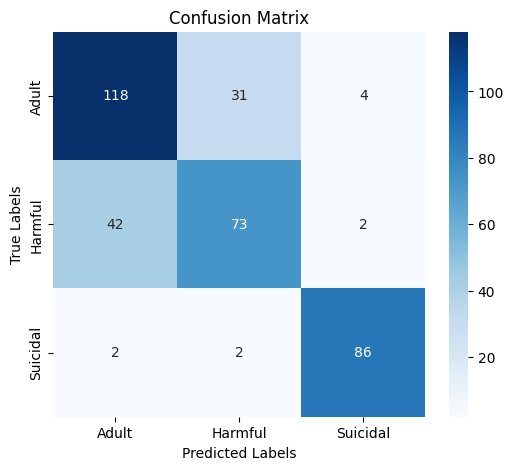

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=uniques, yticklabels=uniques)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Save the full model, not just the transformer
torch.save(model.state_dict(), "/content/drive/MyDrive/SafeReels-664/Models/Text_models/BB-LSTM-1.pth")